In [1]:
import pandas as pd
import numpy as np
#import datapane as dp 
#import plotly.express as px
import ipywidgets as widgets
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
#import matplotlib.image as mpimg
from ipywidgets import interact, interactive, fixed, interact_manual
#from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox
warnings.filterwarnings('ignore')
#plt.xkcd()


In [2]:
bets=pd.read_csv('bets.csv', index_col='id')
matches=pd.read_csv('matches.csv', nrows=48)
bets['score']=bets['HomeTeamScore'].astype('str')+"x"+bets['AwayTeamScore'].astype('str')
matches['match']=matches['MatchNumber'].astype(str)+"-"+matches['HomeTeam']+ " x "+matches['AwayTeam']
completo=pd.read_csv('users_completo.csv')
bets=pd.merge(bets, completo, left_on='punter_username',right_on='username', how='left')
bets=bets[['id','game_number', 'HomeTeamScore', 'AwayTeamScore', 'punter_username',
        'name','score' ]]
bets.rename(columns={"name": "Nome", "score": "Placar"}, inplace=True)

In [9]:
serenini=[22,28,46,47,50,52,53,62,63,64,67,84,87,107,110]

In [4]:
var = ''
def f(x):
    global var
    var = x
    return x

In [5]:
# interact(f, x=bets.sort_values('punter_username')['punter_username'].unique()); get user
interact (f, x=matches['match']);

interactive(children=(Dropdown(description='x', options=('1-Qatar x Ecuador', '3-England x Iran', '2-Senegal x…

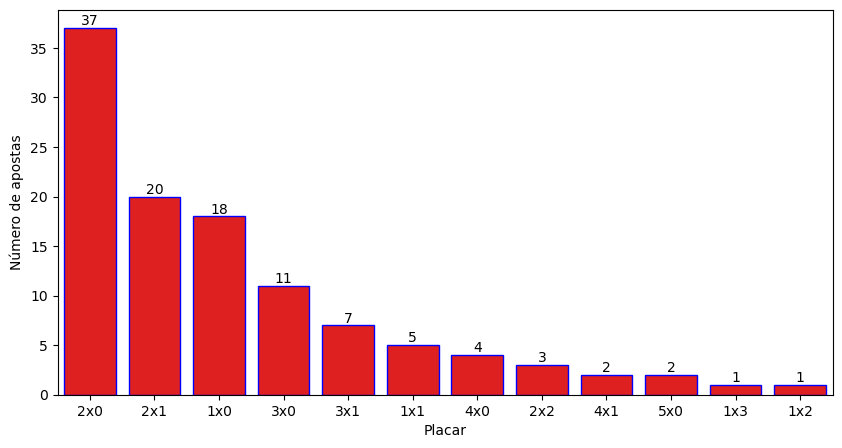

In [18]:
game_selected=matches[matches['match']==var]['MatchNumber'].tolist()
bets_selected=bets[bets['game_number']==game_selected[0]]
plt.figure(figsize=(10,5))
ax=sns.countplot(bets_selected['Placar'], color='red',edgecolor='blue', order=bets_selected['Placar'].value_counts().index, zorder=2)
ax.bar_label(ax.containers[0])
plt.xlabel('Placar')
plt.ylabel('Número de apostas');
#plt.axhline(1, linestyle='--', color='red', zorder=1)
#plt.yticks(np.append(ax.get_yticks()[1:],1));
#plt.title('França X Austrália');

In [20]:
#Filtrar ousados
bets_selected[bets_selected['Placar'].map(bets_selected['Placar'].value_counts()) <3]


,id,game_number,HomeTeamScore,AwayTeamScore,punter_username,Nome,Placar
491,15,9,1,3,sergiolehmkuhl,Sérgio Lehmkuhl,1x3
731,22,9,4,1,Thayrine,Thayrine,4x1
1595,40,9,4,1,Gueguel13,Gabriel Paes,4x1
2075,50,9,1,2,Rserenini,Rita serenini,1x2
5051,114,9,5,0,MV_22408,Marcus Vinicius 22408,5x0
5291,120,9,5,0,rubio_oficial,Rúbio,5x0


In [13]:
#Filtrar placar específico
bets_selected.query("Placar=='4x0'")

,id,game_number,HomeTeamScore,AwayTeamScore,punter_username,Nome,Placar
2026,49,10,4,0,Rangel,Rangel,4x0
3130,72,10,4,0,Giorox,Giovanni,4x0
3802,87,10,4,0,dserenini,Danilo Serenini,4x0
5290,120,10,4,0,rubio_oficial,Rúbio,4x0


In [21]:
#Filtrar palpites Família Serenini
bets_selected[bets_selected['id'].isin(serenini)]

,id,game_number,HomeTeamScore,AwayTeamScore,punter_username,Nome,Placar
731,22,9,4,1,Thayrine,Thayrine,4x1
1019,28,9,1,0,Renan_Serenini,Renan Serenini,1x0
1883,46,9,1,0,Ronaldo,Ronaldo serenini,1x0
1931,47,9,2,1,Rosângela,Rosângela,2x1
2075,50,9,1,2,Rserenini,Rita serenini,1x2
2171,52,9,2,1,FredPellegrini,Fred Pellegrini,2x1
2219,53,9,2,1,NinaSerenini,Nina Serenini,2x1
2651,62,9,2,2,Maserenini,Maria zilda,2x2
2699,63,9,2,0,caioserenini,Caio Serenini,2x0
2747,64,9,1,0,Milena,Milena,1x0


In [ ]:
#arr_lena = mpimg.imread('Lenna.jpg')
#imagebox = OffsetImage(arr_lena, zoom=0.31)
#ab = AnnotationBbox(imagebox, (8, 20))
#ax.add_artist(ab)
